In [9]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# SMALL WORLD

Pour chaque N de NList je génère 2 graphes. 
Pour chaque réalisation de l'expérience j'ajoute le graphe de barabasi_albert. 
Créer plusieurs expérience pour chaque valeur de paramètre qui nous intéresse.
La génération est très rapide. 

In [10]:
Nlist=[100,250,500,750,1000,1250,1500,1750,2000]
NREPL=2
m=3

In [11]:
#graph generation
graphs={}
for nn in Nlist:
    print(nn)
    graphs[nn]=[]
    for r in range(NREPL):
        graphs[nn].append(nx.barabasi_albert_graph(nn,3))

100
250
500
750
1000
1250
1500
1750
2000


Je calcule les avShPath pour tous ces réseaux et je fais la moyenne pour ceux qui ont le même paramètre. Par exemple pour 500 noeuds j'ai 2 valeurs d'avShPath et je prends la moyenne entre ces deux valeurs. 

In [13]:
avShPath=[]
for nn in Nlist:
    print(nn)
    l=[]
    for G in graphs[nn]:
        l.append(nx.average_shortest_path_length(G))
    avShPath.append(np.mean(l))

100
250
500
750
1000
1250
1500
1750
2000


Je regarde ça dans l'espace linéaire on a une courbe, et dans un espace semi-logarithmique on a ça.
Donc on a une courbe logarithmique de barabasi alberte respecte l'effet de **small world**

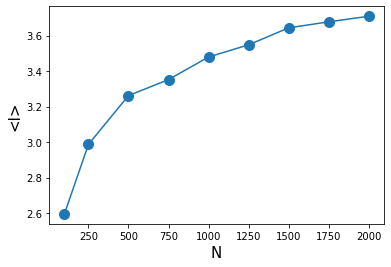

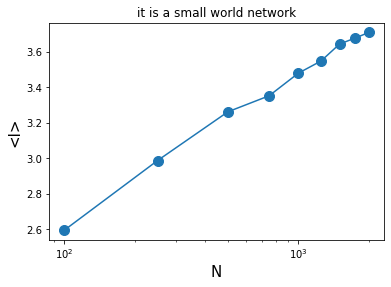

In [14]:
plt.plot(Nlist,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.show()

plt.semilogx(Nlist,avShPath,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<l>',size=15)
plt.title('it is a small world network')
plt.show()

# clustering

Je veux désormais regarder le clustering. On fait pareil, on calcul le clustering de chaque réseau et on prend la moyenne sur les expériences. Et là par contre le clustering pour les réseaux très grands deviennent très faibles. Donc le clustering n'est pas tout à fait élevé pour ce type de réseau. 

In [11]:
clustering=[]
for nn in Nlist:
    print nn
    c=[]
    for G in graphs[nn]:
        clustList=[nx.clustering(G,i) for i in G.nodes()]
        c.append(np.mean(clustList))
    clustering.append(np.mean(c))

100
250
500
750
1000
1250
1500
1750
2000


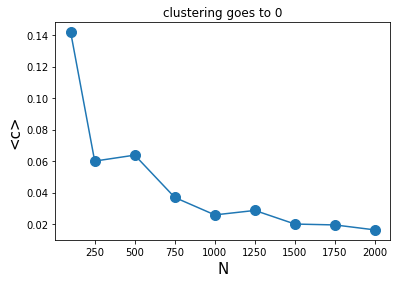

In [12]:
plt.plot(Nlist,clustering,'o-',markersize=10)
plt.xlabel('N',size=15)
plt.ylabel('<c>',size=15)
plt.title('clustering goes to 0')
plt.show()

# degree Mixing

Est-ce que les noeuds élevés ont tendances à être connectés de degrés élevés et faible avec faible ? (assortativité). Pour cela on doit regarder le degré moyen des voisins. 

In [13]:
N=5000
m=3
Nrepl=10

Remarque : il y a une nouvelle commande dans networkx qui permet de mesurer le degré des voisins. A regarder, ce n'est pas utilisé ici. 

In [14]:
knn=[]
kk=[]
for r in range(Nrepl):
    G=nx.barabasi_albert_graph(N,3)
    knn=knn+[ np.mean([G.degree(v) for v in G.neighbors(u)])  for u in G.nodes()]
    kk=kk+[G.degree(u) for u in G.nodes()]

La moyenne correspond aux points orange. Un réseau de Barabasi Albert il n'y a pas de corrélation de degrés. Comment il existe des noeuds connectés des "rich clubs" (réécouter). Si vous avez besoin d'estimer la relations les plus élevés

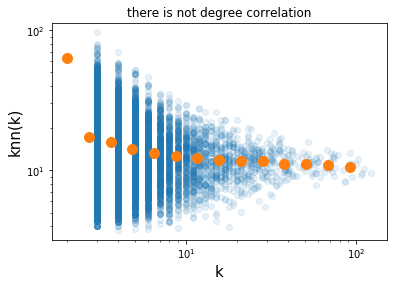

In [15]:
plt.loglog(kk,knn,'o',alpha=0.1)
logBins=np.logspace(np.log2(np.min(kk)),np.log2(np.max(kk)),base=2,num=15)
#if I use np.linspace I will have linear bins
ybin,xbin,binnumber=scipy.stats.binned_statistic(kk,knn,statistic='mean',bins=logBins)
plt.loglog(xbin[:-1],ybin,'o',markersize=10)

plt.xlabel('k',size=15)
plt.ylabel('knn(k)',size=15)
plt.title('there is not degree correlation')
plt.show()